In [23]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# 한글 폰트 설정
# 맥북에서 한글 폰트 설정
plt.rc("font", family="AppleGothic")

In [25]:
# Step 1: Load Data
def load_json(file_path):
    with open(file_path, "r") as f:
        return json.load(f)

In [26]:
# Define file paths
tracking_files = [
    # 장소 A - 인하대 후문
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/tracking_0.json",
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/tracking_1.json",
    "../outputs/DJI_0279,DJI_0280/tracking_0.json",
    # "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/tracking_3.json", # 문제 발견
    # 장소 B - 인경호-학생회관
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/tracking_2.json",
    "../outputs/DJI_0279,DJI_0280/tracking_1.json",
    # 장소 C - 60주년-정석학술정보관
    "../outputs/DJI_0268/tracking_0.json",
    "../outputs/DJI_0287/tracking_0.json",
    # "../outputs/DJI_0289/tracking_0.json",  # 문제 발견
]
intersection_files = [
    # 장소 A - 인하대 후문
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/intersections_0.json",
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/intersections_1.json",
    "../outputs/DJI_0279,DJI_0280/intersections_0.json",
    # "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/intersections_3.json", # 문제 발견
    # 장소 B - 인경호-학생회관
    "../outputs/DJI_0269,DJI_0271,DJI_0272,DJI_0273/intersections_2.json",
    "../outputs/DJI_0279,DJI_0280/intersections_1.json",
    # 장소 C - 60주년-정석학술정보관
    "../outputs/DJI_0268/intersections_0.json",
    "../outputs/DJI_0287/intersections_0.json",
    # "../outputs/DJI_0289/intersections_0.json",   # 문제 발견
]

In [27]:
# Load data
tracking_data = [load_json(file) for file in tracking_files]
intersection_data = [load_json(file) for file in intersection_files]

In [28]:
# Flatten tracking results
tracking_results = []
for data in tracking_data:
    for result in data["tracking_results"]:
        tracking_results.extend(result["res"])

tracking_df = pd.DataFrame(tracking_results)

# Flatten intersection data
intersection_df = pd.concat(
    [pd.DataFrame(data) for data in intersection_data], ignore_index=True
)

In [29]:
# Replace numeric labels with Korean class names
CLASS_MAPPING = {
    0: "버스",
    1: "자동차",
    2: "자전거",
    3: "킥보드",
    4: "오토바이",
    5: "보행자",
    6: "트럭",
}

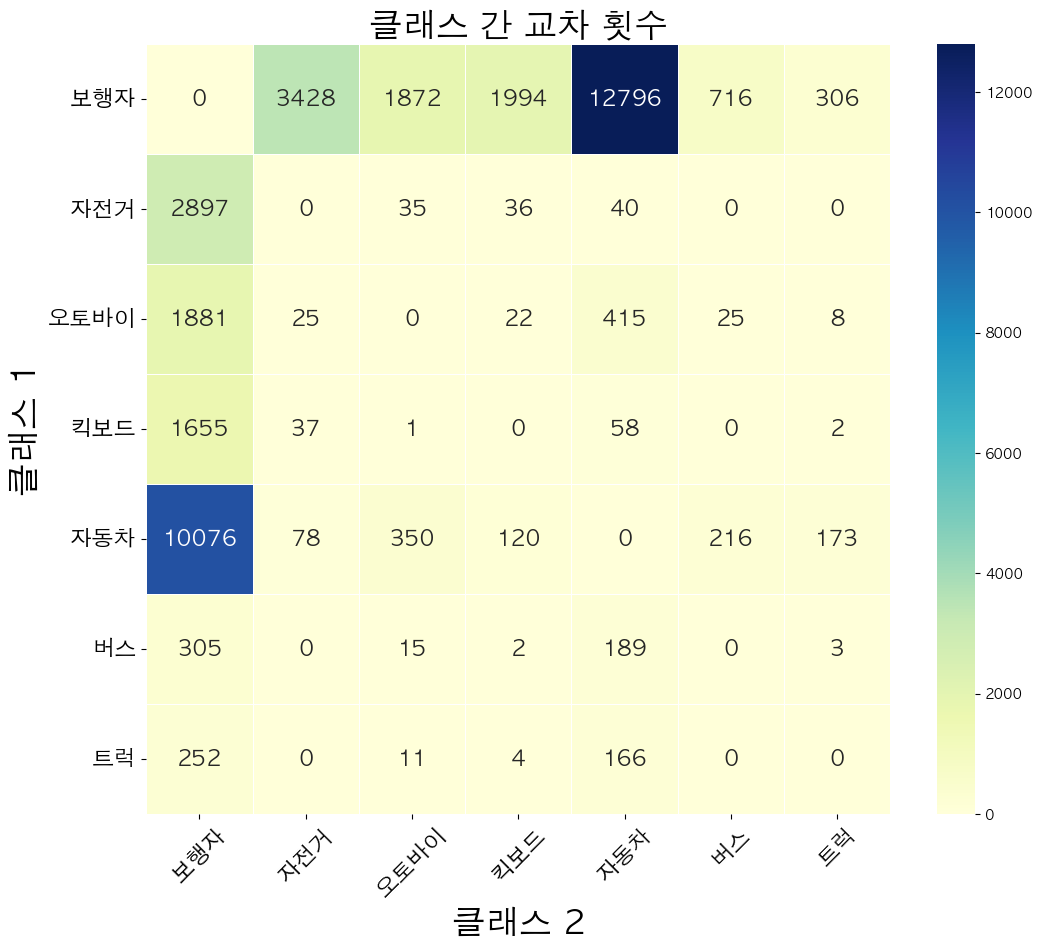

교차 빈도 실제 값:


class_2,보행자,자전거,오토바이,킥보드,자동차,버스,트럭
class_1,,,,,,,
보행자,0,3428,1872,1994,12796,716,306
자전거,2897,0,35,36,40,0,0
오토바이,1881,25,0,22,415,25,8
킥보드,1655,37,1,0,58,0,2
자동차,10076,78,350,120,0,216,173
버스,305,0,15,2,189,0,3
트럭,252,0,11,4,166,0,0


In [30]:
# 클래스 간 교차 빈도 (correlation)
# 클래스 ID를 이름으로 매핑
intersection_df["class_1"] = intersection_df["class_id_1"].map(CLASS_MAPPING)
intersection_df["class_2"] = intersection_df["class_id_2"].map(CLASS_MAPPING)

# 클래스 간 교차 횟수 계산 (빈도)
cross_tab = pd.crosstab(intersection_df["class_1"], intersection_df["class_2"])

# 클래스 순서 변경
ordered_classes = ["보행자", "자전거", "오토바이", "킥보드", "자동차", "버스", "트럭"]
cross_tab = cross_tab.reindex(index=ordered_classes, columns=ordered_classes)

# NaN 값을 0으로 채우기
cross_tab = cross_tab.fillna(0.0)

# 히트맵 시각화 (빈도 그대로)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cross_tab,
    annot=True,
    fmt=".0f",  # 정수 형태로 출력
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={"size": 16},  # Increase font size of the numbers inside the heatmap
)
plt.title("클래스 간 교차 횟수", fontsize=24)
plt.xlabel("클래스 2", fontsize=24)
plt.ylabel("클래스 1", fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

# 실제 교차 횟수 출력
print("교차 빈도 실제 값:")
display(cross_tab)


/var/folders/rq/js032n995s72ggmxhlrkcvrr0000gn/T/ipykernel_22432/3061610167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tracking_df["speed(km/h)"] = filtered_tracking_df["speed(m/s)"] * 3.6
/var/folders/rq/js032n995s72ggmxhlrkcvrr0000gn/T/ipykernel_22432/3061610167.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(


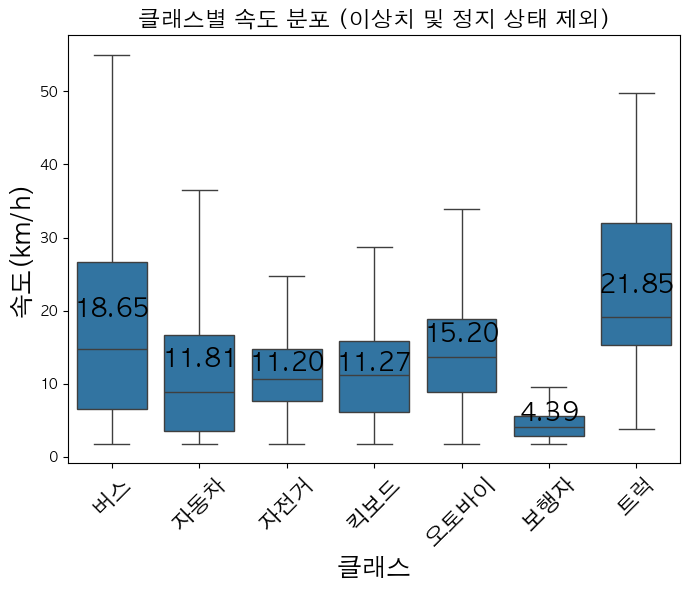


클래스별 속도 통계 (km/h):
         count       mean        std    min     25%     50%     75%      max
cid                                                                         
0        848.0  18.653179  15.846015  1.836   6.588  14.760  26.721  124.884
1      51807.0  11.811527  10.311600  1.836   3.492   8.820  16.704   68.472
2       9737.0  11.198777   4.967060  1.836   7.668  10.656  14.760   30.528
3       5361.0  11.265656   5.940594  1.836   6.156  11.232  15.876   28.656
4       5281.0  15.201939   9.249622  1.836   8.892  13.608  18.900   64.944
5    1343793.0   4.393481   1.904108  1.836   2.880   4.032   5.544   33.732
6        628.0  21.847299  10.425272  3.852  15.291  19.098  31.932   87.444


In [31]:
# THRESHOLD 이상 속도만 처리
THRESHOLD = 0.5
filtered_tracking_df = tracking_df[tracking_df["speed(m/s)"] > THRESHOLD]

# Convert speed from m/s to km/h
filtered_tracking_df["speed(km/h)"] = filtered_tracking_df["speed(m/s)"] * 3.6

# Recalculate class statistics with the new speed unit
class_stats = filtered_tracking_df.groupby("cid")["speed(km/h)"].describe()

# Create a normalized boxplot with the new speed data
plt.figure(figsize=(7, 6))
sns.boxplot(x="cid", y="speed(km/h)", data=filtered_tracking_df, showfliers=False)

# Customize the plot with Korean class labels
plt.xlabel("클래스", fontsize=18)
plt.ylabel("속도(km/h)", fontsize=18)
plt.title("클래스별 속도 분포 (이상치 및 정지 상태 제외)", fontsize=16)

current_labels = plt.gca().get_xticklabels()
plt.gca().set_xticklabels(
    [CLASS_MAPPING[int(label.get_text())] for label in current_labels], fontsize=16
)
plt.xticks(rotation=45)

# Add mean value above each box
for idx, stats in enumerate(class_stats.itertuples()):
    mean_val = stats.mean
    plt.text(
        idx,
        mean_val,
        f"{mean_val:.2f}",
        horizontalalignment="center",
        verticalalignment="bottom",
        fontsize=18,
    )

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n클래스별 속도 통계 (km/h):")
print(class_stats)

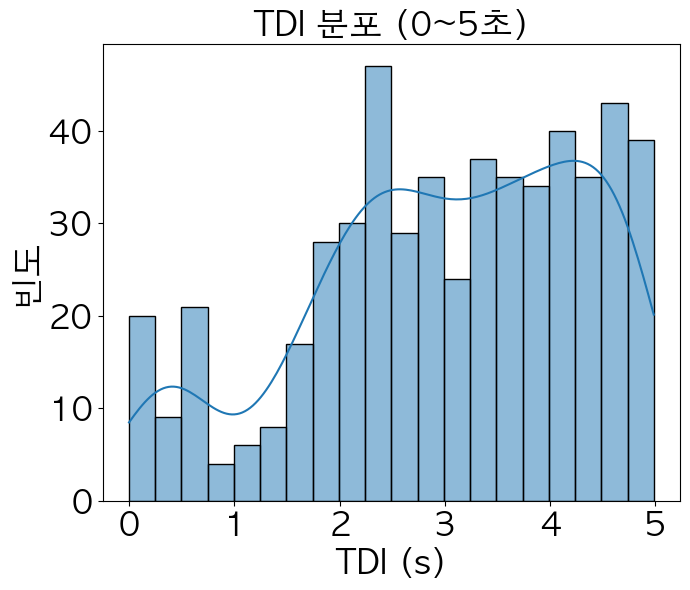


TDI 통계 (0~5초):
count    541.000000
mean       3.017438
std        1.320567
min        0.000000
25%        2.201431
50%        3.168727
75%        4.136023
max        4.985104
Name: time_difference, dtype: float64


In [32]:
# TDI 분포
# intersection에서 time_difference가 TDI 임.

# Filter data for time differences between 0 and 5 seconds
filtered_intersection_df = intersection_df[
    (intersection_df["time_difference"] >= 0)
    & (intersection_df["time_difference"] <= 5)
]

# Plot TDI distribution
plt.figure(figsize=(7, 6))  # Changed from (10, 6) to (7, 6)
sns.histplot(filtered_intersection_df["time_difference"], bins=20, kde=True)

# Customize the plot - increase font size
plt.xlabel("TDI (s)", fontsize=24)
plt.ylabel("빈도", fontsize=24)
plt.title("TDI 분포 (0~5초)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.show()

# Print statistical summary
print("\nTDI 통계 (0~5초):")
print(filtered_intersection_df["time_difference"].describe())

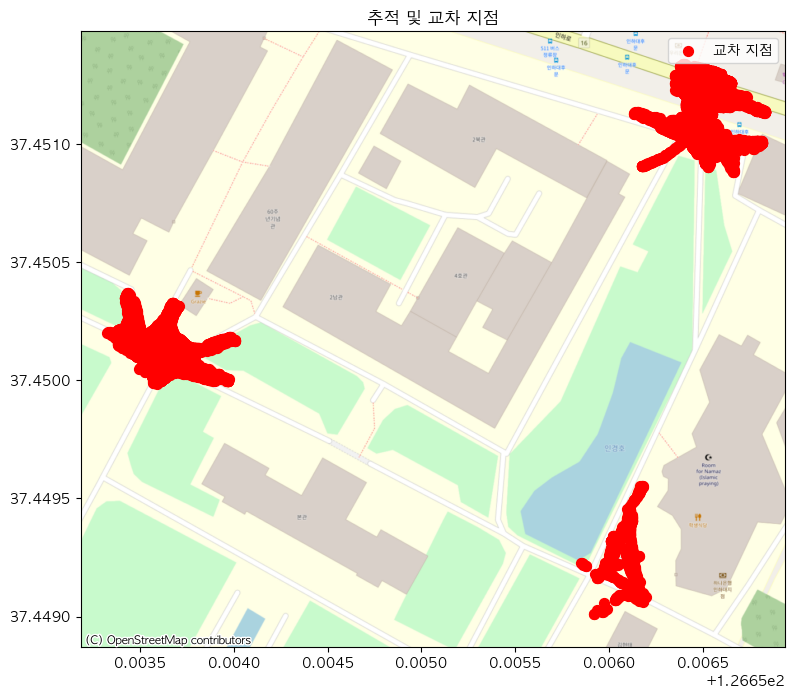

In [33]:


geo_tracking_df = tracking_df.dropna(subset=["latitude", "longitude"])
gdf = gpd.GeoDataFrame(
    geo_tracking_df,
    geometry=gpd.points_from_xy(geo_tracking_df.longitude, geo_tracking_df.latitude),
    crs="EPSG:4326",
)

# Convert intersection data to GeoDataFrame
# filtered_interesction_df ? 
geo_intersection_df = intersection_df.dropna(subset=["latitude", "longitude"])
intersection_gdf = gpd.GeoDataFrame(
    geo_intersection_df,
    geometry=gpd.points_from_xy(
        geo_intersection_df.longitude, geo_intersection_df.latitude
    ),
    crs="EPSG:4326",
)

# Define the bounding box based on the data
min_lat, max_lat = gdf["latitude"].min(), gdf["latitude"].max()
min_lon, max_lon = gdf["longitude"].min(), gdf["longitude"].max()

padding = 0.0001
min_lat -= padding
max_lat += padding
min_lon -= padding
max_lon += padding

import contextily as ctx  # For adding basemaps

# Plot georeferenced data with a focused view and basemap
fig, ax = plt.subplots(figsize=(12, 8))


# Plot intersection points
intersection_gdf.plot(ax=ax, markersize=50, color="red", label="교차 지점")

# Add basemap with a valid zoom level
ctx.add_basemap(
    ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=19
)

# Set the limits to focus on the interesting area
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add title and legend
plt.title("추적 및 교차 지점")
plt.legend()
plt.show()